# Tarea 17 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

In [1]:
include("modulos/herramientas.jl");

In [2]:
using PyPlot

El mapeo logístico es de la familia de mapeos polinomiales de grado dos el cuál fue popularizado por el biólogo británico Robert May en 1976 como un modelo demográfico temporal discreto basado análogo a la ecuación diferencial logística creada por el matemático belga Pierre François Verhlust en 1838.
Dicho mapeo es descrito matemáticamente por la siguiente relación:
$$x_{n+1}=rx_n(1-x_n)$$
Los valores que toma $x_n$ están entre $0$ y $1$ representando la proporción entre la población existente respecto a la máxima población posible mientras que $r$ toma valores entre $0$ y $4$.
Notemos que podemos expresar la relación descrita anteriormente como:
$$f(x_n)=rx_n(1-x_n)$$
De este sistema dinámico podemos obtener su exponente característico Lyapunov maximal usando la definición de ésta para sistemas temporales discretos $x_{n+1}=f(x_n)$ con punto inicial $x_0$:
$$\lambda(x_0)=\lim_{n\rightarrow \infty}\displaystyle\frac{1}{n} \sum_{i=0}^{n-1}\log\lvert f'(x_i)\rvert$$

En esta tarea se pide graficar el exponente característico Lyapunov maximal así como el diagrama de bifurcaciones. Para hacer lo segundo debemos iterar muchas ocasiones el sistema dinámico dado, _i.e._ graficar $f^n(x)=f\circ f^{n-1}(x)$ para $n \rightarrow \infty$ ($n$ con valor muy grande) contra $x$.

In [21]:
#Funcion que aproxima  el valor del exponente caracteristico Lyapunov maximal usando la definición para sistemas temporales
#discretos.
#Valores de la funcion:
#f -> función f(x_n) descrita anteriormente
#x0 -> Punto inicial
#lista -> lista con valores a tomar entre 0 y 4 para evaluar distintas condiciones r
#n -> Se da un valor de n alto para obtener el diagrama de bifurcaciones con mayor detalle
function exp_lyapunov(f,x0,lista,n)
    #Arreglos vacios para guardar valores de:
    lambda=[] #Exponente de Lyapunov
    bifurcacion=[] #Iteraciones del sistema dinamico
    for r in lista #Ciclo for controlado por los valores dentro de lista_r
        x=x0 #Punto inicial
        g(z)=f(z,r) #Como se da r fijo solo tenemos una variable
        dg=herramientas.derivacion_simetrica(g,x,0.0001) #Aproximación numérica a la derivada por derivación simétrica en x
        l=log(abs(dg)) #Obtenemos el logaritmo del valor absoluto indicado en la definición dada
        for i in 2:n
            x=f(x,r) #Ecuación del sistema dinámico temporal discreto
            dg=herramientas.derivacion_simetrica(g,x,0.0001) #Aplicamos la derivada al nuevo valor de x
            l+=log(abs(dg)) #Vamos sumando los valores a l de los logaritmos del valor absoluto de la nueva dg
        end
        push!(lambda,l/n) #Se agrega a lambda el valor l/n (Es el exponente de  Lyapunov para la r dada)
        for j in 1:20
            x=f(x,r) #Calculamos más iteraciones para el diagrama de bifurcación
            push!(bifurcacion,x) #Salvamos dichos valores
        end
    end
    xbifurcacion=linspace(lista[1],lista[length(lista)],20*length(lista)) #Damos el valor xbifurcación
    return lambda,xbifurcacion,bifurcacion
end

exp_lyapunov (generic function with 1 method)

In [22]:
f(x,r)=r*x*(1-x) #Función del mapeo logístico

f (generic function with 1 method)

In [23]:
r=linspace(1,4,500)
L=exp_lyapunov(f,0.1,r,100000)

(Any[-0.000185329, -0.00608775, -0.0121408, -0.0182366, -0.0243722, -0.030547, -0.0367611, -0.0430146, -0.0493079, -0.0556414  …  0.569552, 0.573786, 0.581956, 0.562665, 0.591439, 0.606525, 0.620247, 0.637376, 0.653868, 0.693151], 1.0:0.00030003000300030005:4.0, Any[9.99807e-6, 9.99797e-6, 9.99787e-6, 9.99777e-6, 9.99767e-6, 9.99757e-6, 9.99747e-6, 9.99737e-6, 9.99727e-6, 9.99717e-6  …  0.664112, 0.89227, 0.384498, 0.946637, 0.20206, 0.644927, 0.915985, 0.307827, 0.852277, 0.503602])

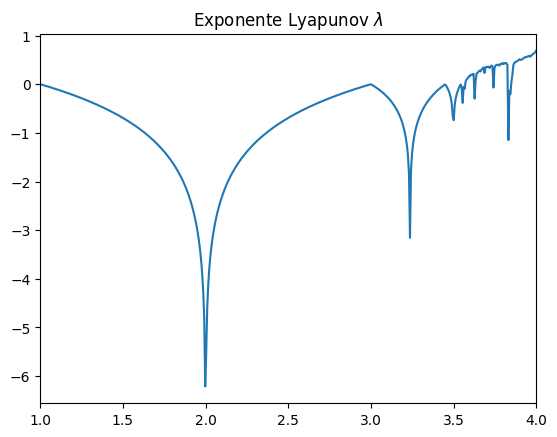

PyObject <matplotlib.text.Text object at 0x7f83c56bacd0>

In [33]:
plot(r,L[1])
xlim([1,4])
title(L"Exponente Lyapunov $\lambda$")

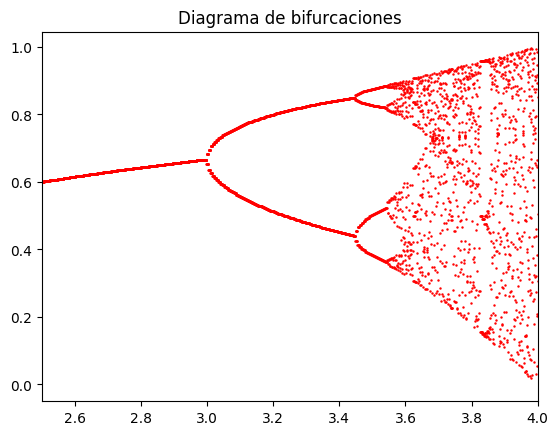

In [34]:
plot(L[2],L[3],"r.",markersize=1.5)
title("Diagrama de bifurcaciones")
xlim(2.5,4);

Finalmente sobreponemos el diagrama de bifurcaciones con la gráfica del Exponente Lyapunov reescalando esta última para comparar los comportamientos.

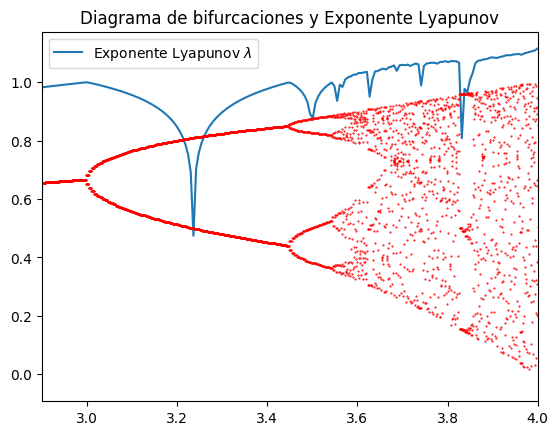

PyObject <matplotlib.legend.Legend object at 0x7f83cd79ead0>

In [35]:
plot(r,(1/6)*L[1]+1,label=L"Exponente Lyapunov $\lambda$")
plot(L[2],L[3],"r.",markersize=1)
title("Diagrama de bifurcaciones y Exponente Lyapunov")
xlim(2.9,4)
legend()

FIN